### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the csv file

In [2]:
df = pd.read_csv('books.csv')
df

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,9788,23399022,23399022,42955411,21,525427651,9.780525e+12,"Amanda Berry, Gina DeJesus, Mary Jordan, Kevin...",2015.0,Hope,...,9102,927,101,195,1180,3301,4325,https://images.gr-assets.com/books/1421708177m...,https://images.gr-assets.com/books/1421708177s...,0
395,9847,20685373,20685373,40000267,18,307720659,9.780308e+12,Suki Kim,2014.0,"Without You, There Is No Us: My Time with the ...",...,10002,1426,145,523,2526,4328,2480,https://images.gr-assets.com/books/1405292426m...,https://images.gr-assets.com/books/1405292426s...,0
396,9887,503248,503248,491309,21,307381269,9.780307e+12,"Howard Dully, Charles Fleming",2007.0,My Lobotomy,...,9615,1247,142,788,2979,3585,2121,https://images.gr-assets.com/books/1320449273m...,https://images.gr-assets.com/books/1320449273s...,0
397,9960,127970,127970,1066433,26,739416383,9.780739e+12,Terry Ryan,2001.0,"The Prize Winner of Defiance, Ohio: How My Mot...",...,11151,1849,118,498,2739,4816,2980,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,0


#### Q1: How many rows and columns are there in books.csv dataset?

In [4]:
df.shape

(399, 24)

#### Q2: How many books do not have an original title?

In [10]:
df.original_title.isna().sum()

36

#### Q3: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing null values in the original_title column.

In [11]:
df.dropna(inplace=True)
df.shape

(318, 24)

In [14]:
df.book_id.nunique()

318

#### Q4: What is the average rating of all the books in the dataset based on ‘average_rating’?

In [15]:
df.average_rating

0      4.10
1      3.51
2      4.24
3      3.94
4      4.30
       ... 
390    3.83
392    3.83
393    3.77
394    4.27
396    3.70
Name: average_rating, Length: 318, dtype: float64

In [16]:
df.mean()["average_rating"]

3.9875157232704423

#### Q5: Find the number of books published in the year ‘2000’ based on the ‘original_publication_year’.

In [20]:
n = df['original_publication_year'].apply(lambda x: x == 2000.0).sum()
n

7

#### Q6: Which book (title) has the maximum number of ratings based on ‘work_ratings_count’.

In [25]:
max_ratings_book = df[df['work_ratings_count'] == df['work_ratings_count'].max()]['original_title']

In [26]:
max_ratings_book

0    Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...
Name: original_title, dtype: object

#### Q7: Bucket the average_rating of books into 11 buckets [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0] with 0.5 decimal rounding (eg: average_rating 3.0 to 3.49 will fall in bucket 3.0). Plot bar graph to show total number of books in each rating bucket.

In [27]:
buckets = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
df['rating_bucket'] = pd.cut(df['average_rating'], bins=buckets, right=False)
bucket_counts = df.groupby('rating_bucket').size()

In [28]:
bucket_counts

rating_bucket
[0.0, 0.5)      0
[0.5, 1.0)      0
[1.0, 1.5)      0
[1.5, 2.0)      0
[2.0, 2.5)      0
[2.5, 3.0)      0
[3.0, 3.5)      7
[3.5, 4.0)    145
[4.0, 4.5)    166
[4.5, 5.0)      0
dtype: int64

In [35]:
df.average_rating.value_counts()

3.96    11
4.08    11
4.10     9
4.04     9
3.99     9
        ..
3.13     1
4.39     1
4.33     1
3.58     1
3.51     1
Name: average_rating, Length: 90, dtype: int64

#### plotting the graph

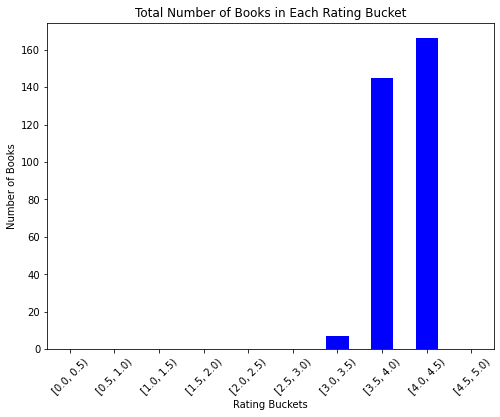

In [36]:
plt.figure(figsize=(8, 6))
bucket_counts.plot(kind='bar', color='blue')
plt.title('Total Number of Books in Each Rating Bucket')
plt.xlabel('Rating Buckets')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()